# Decision Trees

## Einleitung
Bei den bisherigen Klassifikationsmethoden hatten wir angenommen, dass unsere Features reellwertig oder im Spezialfall diskret waren, also dass $X \subseteq \mathbb{R}^d$ bzw. $X \subseteq \mathbb{N}^d$. In beiden Fällen gibt es natürliche Distanzmetriken, wie z.B. die euklidische Norm $\|x− x'\|_2$. Mit Hilfe einer solchen Metrik kann z.B. bei KNN der bzw. die nächsten Nachbarn bestimmt werden.

## Nominale Features
Wir müssen jedoch auch den Fall betrachten, wenn $X$ nominal, das bedeutet diskret, jedoch ohne natürliche Distanzmetrik ist. Zum Beispiel wollen wir anhand der Features
- Farbe $X_{\text{Farbe}} = \{\text{rot, grün, gelb}\}$
- Form $X_{\text{Form}} = \{\text{rund, dünn}\}$
- Größe $X_{\text{Größe}} = \{\text{groß, mittel, klein}\}$
- Geschmack $X_{\text{Geschmack}} = \{\text{süß, sauer}\}$

verschiedene Obstsorten beschreiben.

Ein Objekt $x \in X$ wird demnach durch ein $d$-Tupel, in diesem Beispiel durch ein $4$-Tupel
$x = (x_1, x_2, x_3, x_4) \in X$
mit
$X = X_{\text{Farbe}} \times X_{\text{Form}} \times X_{\text{Größe}} \times X_{\text{Geschmack}}$.
So wäre ein Apfel etwa beschrieben durch $(\text{rot, rund, mittel, süß})$.

## Klassifikation
Bei der Klassifikation mit Entscheidungsbäumen befinden wir uns demnach in einem Szenario, bei welchem wir eine Funktion $f : X \rightarrow Y$ lernen wollen, wobei $X$ reell, diskret oder auch nominal ist und $Y = \{y_1, \ldots, y_m\}$ eine diskrete Menge von Klassen.

Bei Entscheidungsbäumen klassifiziert man nun Objekte anhand nominaler Kriterien mit Hilfe von Fragensequenzen, wobei die nächste Frage abhängt von der Antwort auf die aktuelle Frage. Wichtig dabei ist, dass die Antwort auf jede Frage nominal ist wie z.B. generell $\{\text{ja, nein}\}$ oder speziell $\{\text{rot, grün, gelb}\}$. Solche Sequenzen von Fragen werden systematisch in einem Entscheidungsbaum repräsentiert.

## Aufbau des Baums
Die Knoten des Baums sind systematische Fragen und die Kanten die jeweiligen Antwortmöglichkeiten. Die Blätter des Baums sind die Klassen. Die Klassifikation beginnt mit der Frage in der Wurzel des Baums und endet in einem Blatt, also einer Klasse. Die Kanten, die einen Knoten verlassen, müssen
- eindeutig und
- erschöpfend
sein, sodass immer genau einer Kante gefolgt wird.

## Entscheidungsbäume: Abbildung
Abbildung 1: Entscheidungsbaum zur Klassifikation von Eigenschaften nach Obstsorten. Die Blätter des Baums sind die Klassen (Obstsorten) und sind blau markiert. Abbildung adaptiert von [DHS00].

## Interpretierbarkeit
Eine Eigenschaft von Entscheidungsbäumen ist, dass sie sehr gut interpretierbar sind:
- Die Klassifikation einzelner Datenpunkte $x \in X$ kann vom Menschen nachvollzogen werden.
- Die Klassen $y \in Y$ selbst erhalten eine Beschreibung anhand von logischen Kriterien. Zum Beispiel:
  - Apfel = $(\text{Farbe} = \text{grün} \wedge \text{Größe} = \text{mittel})$
  - $\lor (\text{Farbe} = \text{rot} \wedge \text{Größe} = \text{mittel})$
  - $\Rightarrow (\text{Farbe} = \text{grün} \lor \text{Farbe} = \text{rot}) \wedge \text{Größe} = \text{mittel}$
- Entscheidungsbäume können daher auch durch explizites Vorwissen ergänzt werden.

## CART Framework
Wie wird nun ausgehend von
- einer Menge von Trainingsdaten $D \subseteq X \times Y$ und
- einer Menge von Entscheidungsfragen
ein Entscheidungsbaum gelernt? Ein Entscheidungsbaum teilt sukzessive die Menge $D$ in immer kleinere Teilmengen. Idealerweise endet jeder Pfad in einer reinen Menge, d.h. einer Menge $F \subseteq D$ für die gilt, dass alle Labels $y$ mit $(x, y) \in F$ gleich sind. Dies ist üblicherweise nicht der Fall und es muss geregelt werden, ob in solchen weitere Aufteilungen erfolgen sollen.

## Allgemeiner Lernalgorithmus
Allgemeiner Lernalgorithmus für Entscheidungsbäume mit Trainingsdaten $D$ und Menge an Fragen $Q$:

## Allgemeiner Lernalgorithmus
Allgemeiner Lernalgorithmus für Entscheidungsbäume mit Trainingsdaten $D$ und Menge an Fragen $Q$:

Algorithm 1 dtree(D, Q)
1. if stop_criteria(D) then
2. return LEAF(compute_class(D))
3. else
4. for each $q \in Q$ do
5. $S_q = \text{split}(D, q)$
6. $ \Delta $ $i_q =\text{compute improvement}$ $(D,S)$
7. end for
8.: $b = \text{argmax}_{q | \Delta i_q>0} \Delta i_q$
9. return NODE(b,dtree($S^{(b)}_1, Q \backslash b$), dtree($S^{(b)}_2, Q \backslash b$), . . . )
10. end if

## CART Methodik
Das CART (Classification And Regression Tree) Framework bietet eine allgemeine Methodik um verschiedenste Arten von Entscheidungsbäumen zu generieren anhand von sechs grundlegenden Fragestellungen:
1. Wieviele Entscheidungsmöglichkeiten und damit Aufteilungen gibt es pro Knoten?
2. Welche Eigenschaften werden in einem Knoten getestet?
3. Wann soll ein Knoten zu einem Blatt werden?
4. Wie wird ein zu großer Baum gestutzt?
5. Wie soll einem unreinen Blatt eine Klasse zugeordnet werden?
6. Wie wird mit unvollständigen Daten umgegangen?

## Aufteilungen
Jede Entscheidung ist mit einem Split (Aufteilung) der Trainingsdaten verbunden. Die Anzahl der Splits kann frei gewählt werden und auch innerhalb eines Baums variieren. Bereits zwei Splits reichen im Allgemeinen aus, d.h. binäre Entscheidungsbäume sind universell. Die Entscheidung beeinflusst potentiell die Performance der Methodik und auch die Wahl der Eigenschaften.

## Entscheidungsbäume: Binärer Baum
Abbildung 2: Ein binärer Entscheidungsbaum zur Klassifikation von Eigenschaften nach Obstsorten. Die Blätter des Baums sind die Klassen (Obstsorten) und sind blau markiert. Positive Entscheidungen (ja) sind grün und negative Entscheidungen (nein) sind rot markiert. Abbildung adaptiert von [DHS00].

## Fragenauswahl und Knotenunreinheit
Hauptziel der Erstellung eines Entscheidungsbaums ist die Einfachheit, d.h. ein Baum mit möglichst wenigen Kanten und Knoten. Wir suchen daher für jeden Knoten die Frage, welche die resultierenden Datenmengen so rein wie möglich macht. Wir nähern uns formal dem Konzept der Reinheit durch das Gegenteil, der Unreinheit (Impurity). Wir bezeichnen mit $i(N)$ die Unreinheit in Knoten $N$ und es sollte gelten, dass
- $i(N) = 0$, falls alle Daten in Knoten $N$ die gleiche Klasse haben
- $i(N)$ groß, wenn alle Kategorien gleich häufig vertreten sind

## Unreinheit
Das bekannteste Maß für Unreinheit oder auch Unordnung ist die (Shannon-)Entropie definiert als

$i(N) = -\sum_{j=1}^m P(y_j) \log_2 P(y_j)$

wobei $P(y_j)$ die relative Häufigkeit der Klasse $y_j$ innerhalb der Trainingsdaten an Knoten $N$ bezeichnet.

## Beispiele für Unreinheit
- 4 Schwarze und 4 weiße Kugeln - Unrein: $p_\circ = p_\bullet = \frac{4}{8} \Rightarrow i(N) = -2 \cdot 0.5 \log_2 0.5 = 1$
- 7 Schwarze und 1 weiße Kugeln - Reiner: $p_\circ = \frac{1}{8}, p_\bullet = \frac{7}{8} \Rightarrow i(N) = -\frac{1}{8} \log_2 \frac{1}{8} - \frac{7}{8} \log_2 \frac{7}{8} \approx 0.54$
- 8 Schwarze und 0 weiße Kugeln - Rein: $p_\circ = 0, p_\bullet = 1 \Rightarrow i(N) = -1 \log_2 1 =0$


## Gini Unreinheit und Missclassification Impurity
Ein weiteres häufiges Maß ist die Gini Unreinheit definiert als

$i(N) = \sum_{i \neq j} P(y_i)P(y_j) = \frac{1}{2} \left(1 - \sum_{j=1}^m P^2(y_j) \right)$

und die Missclassification Impurity definiert als

$i(N) = 1 - \max_j P(y_j)$.

## Plots der Unreinheitsmaße
Abbildung 3: Plots der Unreinheitsmaße Entropie (orange), Gini Impurity (grün) und Missclassification Impurity (blau) in Abhängigkeit von der relativen (binären) Klassenzugehörigkeit $p = P(y_1) = 1 - P(y_2)$.

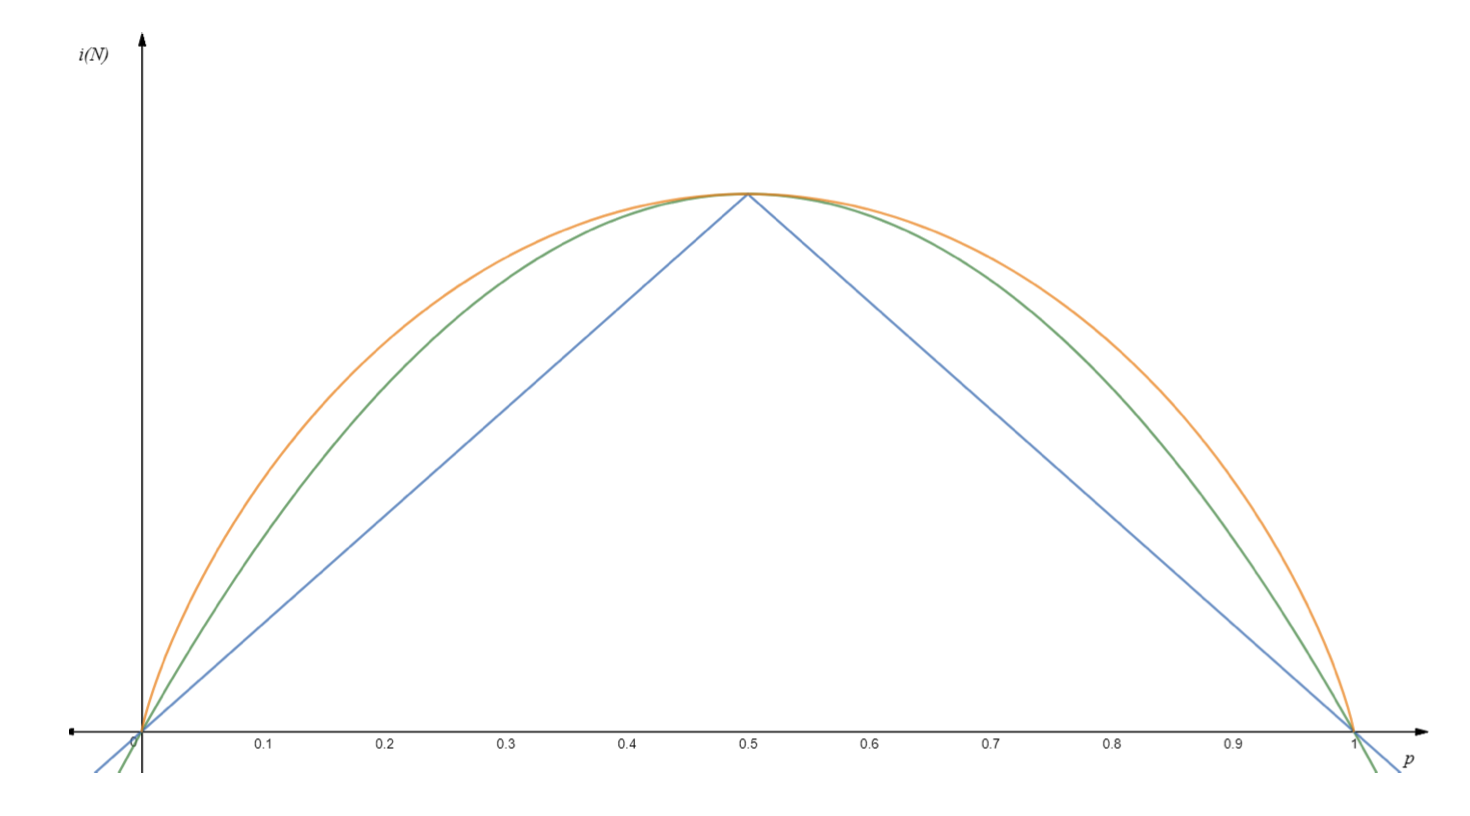

In [4]:
from IPython.display import Image, display

# Bild anzeigen
image_path = "media/decisiom.png"  # Pfad zum Bild
display(Image(filename=image_path))

## Split-Heuristik
Wir betrachten der Einfachheit halber nur den Fall eines (bisher partiell bis zu einem Knoten $N$ erstellten) binären Baums und wollen wissen, welche Frage an diesem Knoten an die übrigen Testdaten gestellt werden sollte. Eine Heuristik in diesem Fall ist die Frage, welche den Rückgang bzgl. der Unreinheit definiert als

$\Delta i(N) = i(N) - P_P i(N_P) - P_N i(N_N)$

minimiert. $N_P$ und $N_N$ sind die positiven bzw. negativen Nachfolgeknoten von $N$ und $P_P = 1 - P_N$ ist der Anteil der Datenpunkte, die dem positiven Knoten zugeordnet werden.

## Nominale und reellwertige Features
Hinweise:
- Bei nominalen Features muss meist ein vollständiger Vergleich aller möglichen Fragen pro Knoten in allen Dimensionen durchgeführt werden. Im Beispiel der Obstklassifikation etwa $Größe = \text{klein}, \ldots, Größe = \text{groß}, Farbe = \text{rot}, \ldots, Farbe = \text{gelb}, Geschmack = \text{sauer}, \ldots$
- Bei diskreten und reellen Features werden oft Vergleiche der Art $x_i \leq c$ mit $c \in \mathbb{R}$ verwendet. Generell beschränkt sich der Suchraum für die Konstanten $c$ meist auf tatsächlich in den Trainingsdaten vorkommende Werte von $x_i$ oder gewichtete Mittel.

## Entscheidungsbaum-Beispiel
Wir wollen nun einen Entscheidungsbaum mit Hilfe der bisherigen Ideen (Entropie als Unreinheitsmaß) aufbauen.
Abbildung 4: Beispiel: Klassifikation von Süßigkeiten.

$i(N) = -\frac{1}{2} \log_2 \frac{1}{2} - \frac{1}{2} \log_2 \frac{1}{2} = 1$

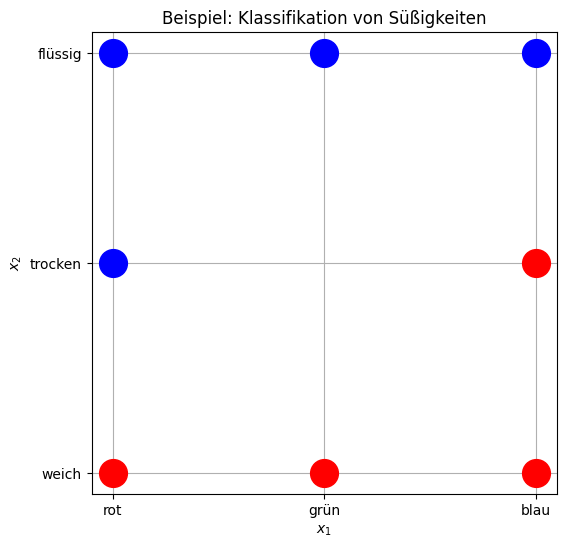

In [5]:
import matplotlib.pyplot as plt

# Daten für das Diagramm
x_labels = ['rot', 'grün', 'blau']
y_labels = ['flüssig', 'trocken', 'weich']
data = [
    ['blue', 'blue', 'blue'],
    ['blue', None, 'red'],
    ['red', 'red', 'red']
]

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Beispiel: Klassifikation von Süßigkeiten')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

## Auswahl der ersten Frage
Frage an der Wurzel $x_1 = \text{rot}$:

$i(L) = -\frac{1}{3} \log_2 \frac{1}{3} - \frac{2}{3} \log_2 \frac{2}{3} \approx 0.9183$

$i(R) = -\frac{2}{3} \log_2 \frac{2}{3} - \frac{1}{3} \log_2 \frac{1}{3} \approx 0.9183$

$\Delta i(N) \approx 1 - \frac{1}{2} \cdot 0.9183 - \frac{1}{2} \cdot 0.9183 \approx 0.0817$

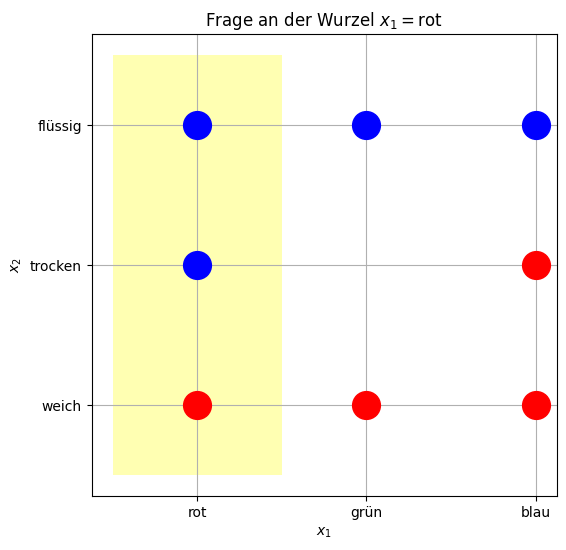

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Daten für das Diagramm
x_labels = ['rot', 'grün', 'blau']
y_labels = ['flüssig', 'trocken', 'weich']
data = [
    ['blue', 'blue', 'blue'],
    ['blue', None, 'red'],
    ['red', 'red', 'red']
]

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbes Rechteck hinzufügen
rect = patches.Rectangle((-0.5, -0.5), 1, 3, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Frage an der Wurzel $x_1 =$rot')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

## Fragenauswahl und Knotenunreinheit

Frage an der Wurzel $x_1 =$ grün:

$i(L) = - \frac{1}{2} \log_2 \frac{1}{2} - \frac{1}{2} \log_2 \frac{1}{2} = 1$

$i(R) = - \frac{1}{2} \log_2 \frac{1}{2} - \frac{1}{2} \log_2 \frac{1}{2} = 1$

$\Delta i(N) = 1 - \frac{2}{6} \cdot 1 - \frac{4}{6} \cdot 1 = 0$

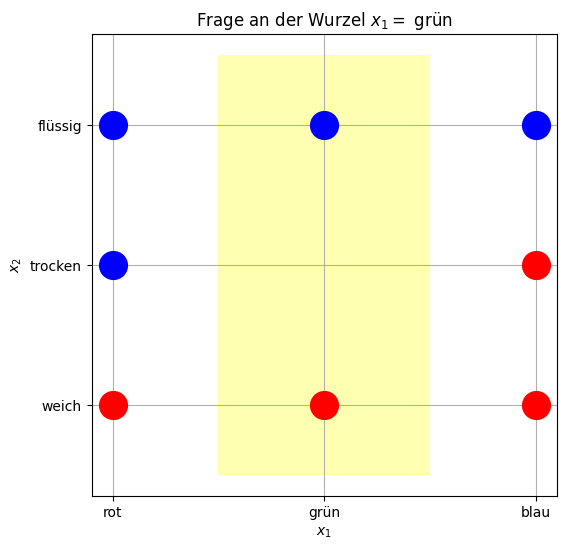

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Daten für das Diagramm
x_labels = ['rot', 'grün', 'blau']
y_labels = ['flüssig', 'trocken', 'weich']
data = [
    ['blue', 'blue', 'blue'],
    ['blue', None, 'red'],
    ['red', 'red', 'red']
]

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbes Rechteck hinzufügen
rect = patches.Rectangle((0.5, -0.5), 1, 3, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Frage an der Wurzel $x_1 =$ grün')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Frage an der Wurzel $x_1 =$ blau:

$i(L) = - 1 \log_2 1 - 0 \log_2 0 = 0$

$i(R) = - \frac{2}{5} \log_2 \frac{2}{5} - \frac{3}{5} \log_2 \frac{3}{5} \approx 0.971$

$\Delta i(N) \approx 1 - \frac{1}{6} \cdot 0 - \frac{5}{6} \cdot 0.971 \approx 0.1908$

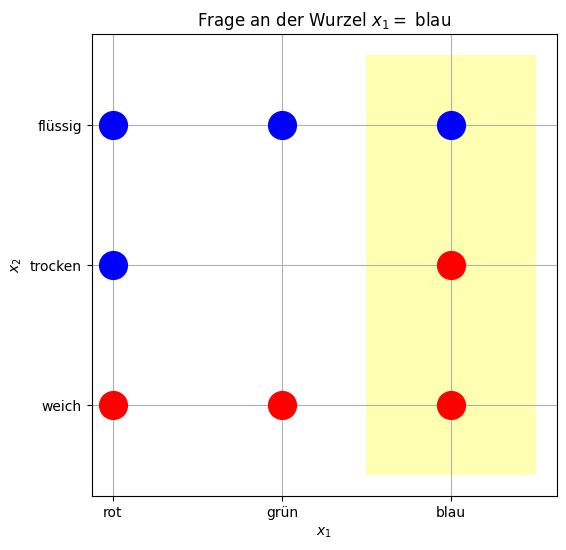

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Daten für das Diagramm
x_labels = ['rot', 'grün', 'blau']
y_labels = ['flüssig', 'trocken', 'weich']
data = [
    ['blue', 'blue', 'blue'],
    ['blue', None, 'red'],
    ['red', 'red', 'red']
]

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbes Rechteck hinzufügen
rect = patches.Rectangle((1.5, -0.5), 1, 3, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Frage an der Wurzel $x_1 =$ blau')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Frage an der Wurzel $x_2 =$ flüssig:

$i(L) = - 0 \log_2 0 - 1 \log_2 1 = 0$

$i(R) = - \frac{3}{4} \log_2 \frac{3}{4} - \frac{1}{4} \log_2 \frac{1}{4} \approx 0.8113$

$\Delta i(N) \approx 1 - \frac{1}{3} \cdot 0 - \frac{2}{3} \cdot 0.8113 \approx 0.4591$

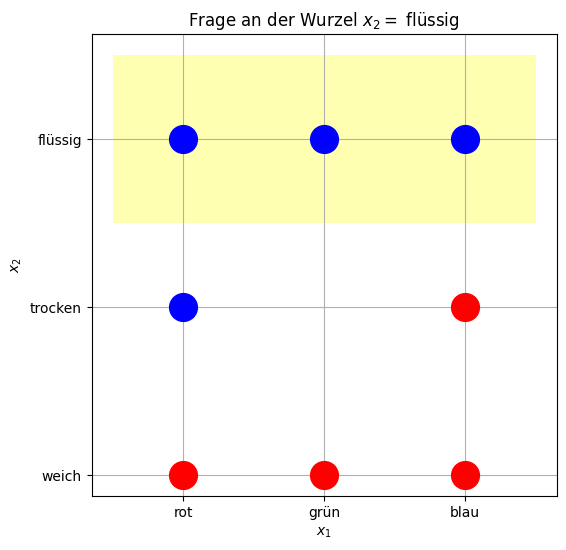

In [12]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbes Rechteck hinzufügen, nur die Fläche "flüssig" bedecken
rect = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Frage an der Wurzel $x_2 =$ flüssig')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Frage an der Wurzel $x_2 =$ trocken:

$i(L) = 1$

$i(R) = 1$

$\Delta i(N) = 0$

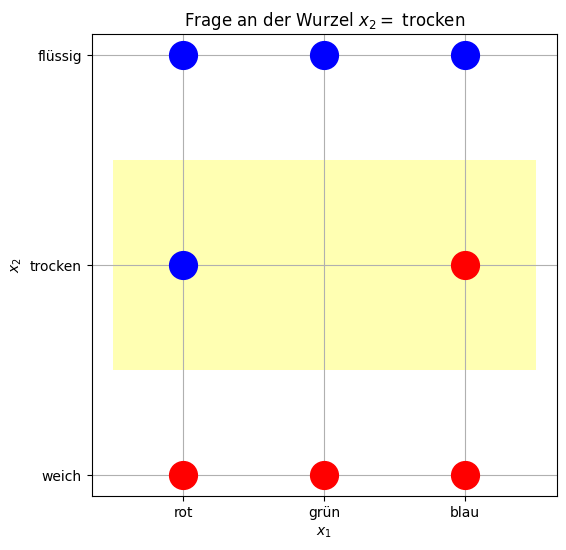

In [11]:
# Daten für das Diagramm
x_labels = ['rot', 'grün', 'blau']
y_labels = ['flüssig', 'trocken', 'weich']
data = [
    ['blue', 'blue', 'blue'],
    ['blue', None, 'red'],
    ['red', 'red', 'red']
]

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbes Rechteck hinzufügen
rect = patches.Rectangle((-0.5, 0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Frage an der Wurzel $x_2 =$ trocken')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Frage an der Wurzel $x_2 =$ weich:

Analog zu $x_2 =$ flüssig, also $\Delta i(N) = 0.4591$.

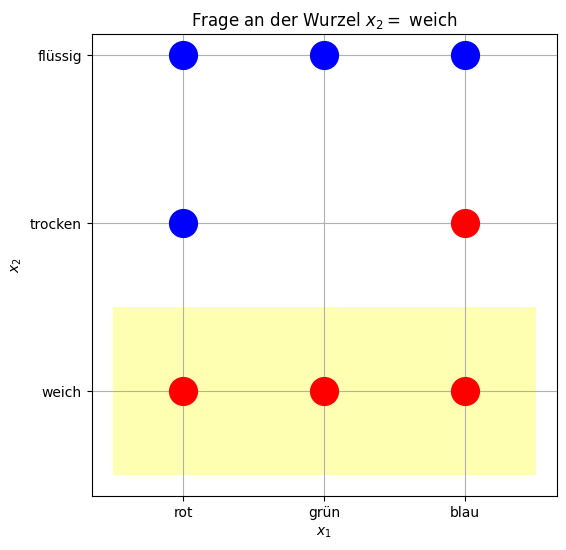

In [13]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbes Rechteck hinzufügen, nur die Fläche "weich" bedecken
rect = patches.Rectangle((-0.5, 1.5), 3, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Frage an der Wurzel $x_2 =$ weich')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Wir wählen also als erste Frage $x_2 =$ flüssig, da sie neben $x_2 =$ weich den maximalen $\Delta i(N)$-Wert besitzt. 

Außerdem stellen wir fest, dass die Daten im linken Knoten rein sind und wir können damit direkt die Klasse positiv (blau) bestimmen.

Die Unreinheit des rechten Knoten beträgt $i(R) = - \frac{3}{4} \log_2 \frac{3}{4} - \frac{1}{4} \log_2 \frac{1}{4} \approx 0.8113$.


### Flüssig steht jetzt fest als Frage. ##

Nächste Frage $x_1 =$ rot:

$i(L) = 1$

$i(R) = 0$

$\Delta i(N) \approx 0.8113 - \frac{1}{2} \cdot 1 - \frac{1}{2} \cdot 0 \approx 0.3113$

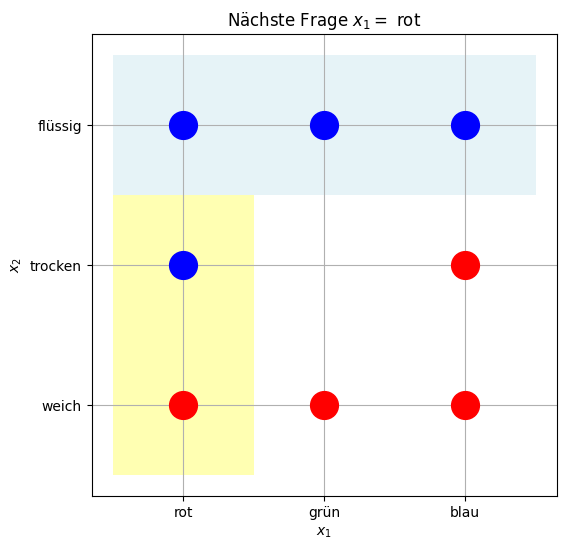

In [14]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe und blaue Rechtecke hinzufügen
rect = patches.Rectangle((-0.5, 0.5), 1, 2, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_1 =$ rot')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Nächste Frage $x_1 =$ grün:

$i(L) = 0$

$i(R) = - \frac{2}{3} \log_2 \frac{2}{3} - \frac{1}{3} \log_2 \frac{1}{3} \approx 0.9183$

$\Delta i(N) \approx 0.8113 - \frac{1}{4} \cdot 0 - \frac{3}{4} \cdot 0.9183 \approx 0.1226$

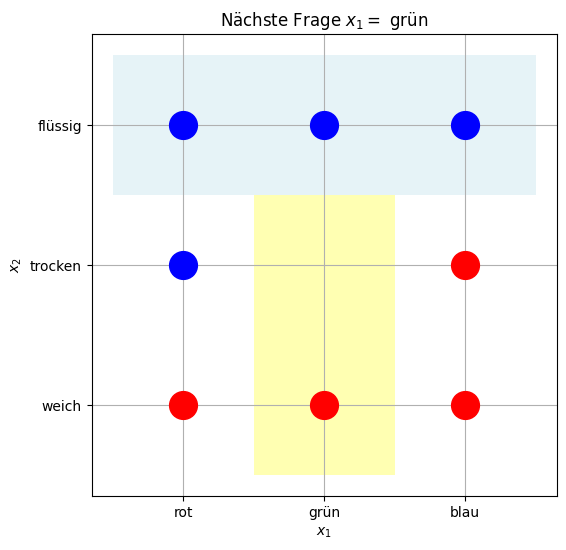

In [15]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe und blaue Rechtecke hinzufügen
rect = patches.Rectangle((0.5, 0.5), 1, 2, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_1 =$ grün')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Nächste Frage $x_1 =$ blau:

$i(L) = 0$

$i(R) = - \frac{2}{3} \log_2 \frac{2}{3} - \frac{1}{3} \log_2 \frac{1}{3} \approx 0.9183$

$\Delta i(N) \approx 0.8113 - \frac{1}{4} \cdot 0 - \frac{3}{4} \cdot 0.9183 \approx 0.1226$

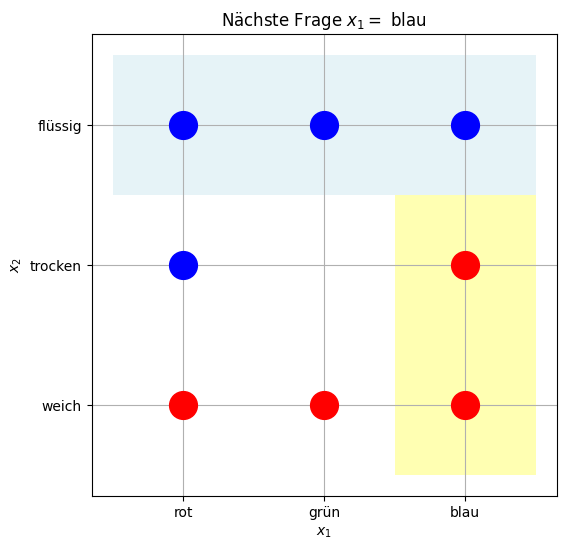

In [16]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe und blaue Rechtecke hinzufügen
rect = patches.Rectangle((1.5, 0.5), 1, 2, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_1 =$ blau')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Nächste Frage $x_2 =$ trocken:

$i(L) = 1$

$i(R) = 0$

$\Delta i(N) \approx 0.8113 - \frac{1}{2} \cdot 1 - \frac{1}{2} \cdot 0 \approx 0.3113$

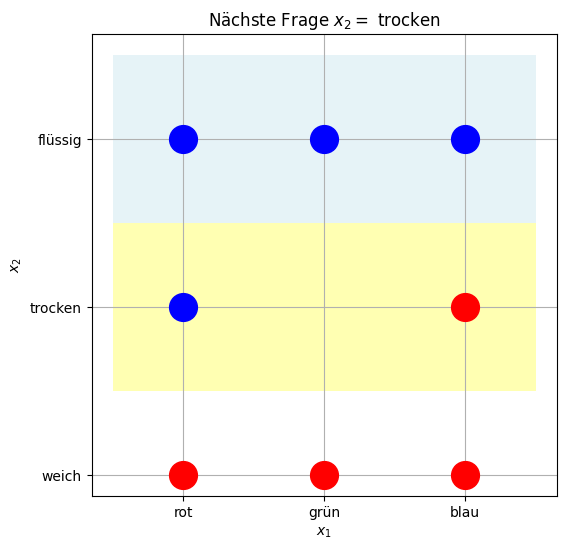

In [18]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe und blaue Rechtecke hinzufügen
rect = patches.Rectangle((-0.5, 0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_2 =$ trocken')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Nächste Frage $x_2 =$ weich:

$i(L) = 0$

$i(R) = 1$

$\Delta i(N) \approx 0.8113 - \frac{1}{2} \cdot 0 - \frac{1}{2} \cdot 1 \approx 0.3113$

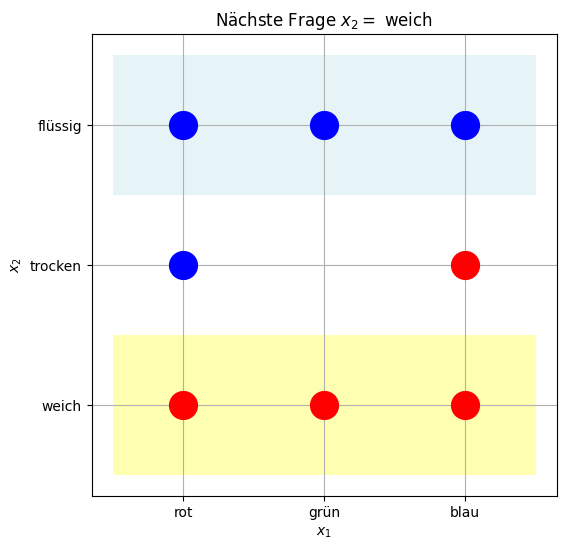

In [17]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe und blaue Rechtecke hinzufügen
rect = patches.Rectangle((-0.5, 1.5), 3, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_2 =$ weich')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Wir wählen also als nächstes Frage $x_2 =$ weich, da sie neben $x_2 =$ trocken den maximalen $\Delta i(N)$-Wert besitzt. Außerdem stellen wir fest, dass die Daten im linken Knoten rein sind und wir können damit direkt die Klasse negativ (rot) bestimmen.

Die Unreinheit des rechten Knoten beträgt $i(R) = 1$.

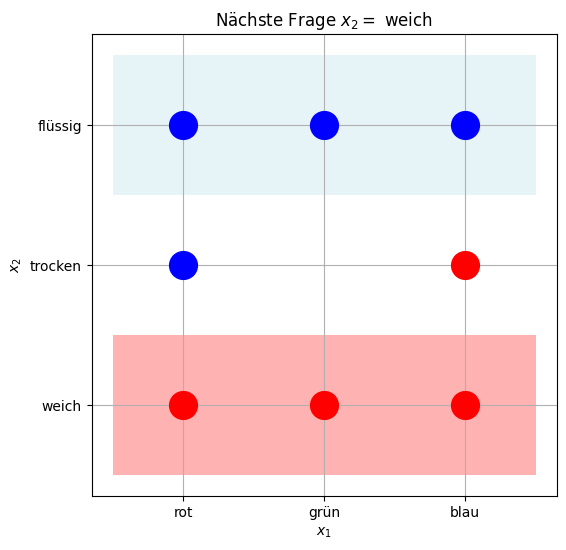

In [19]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Blaue und rote Rechtecke hinzufügen
rect = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, 1.5), 3, 1, linewidth=1, edgecolor='none', facecolor='red', alpha=0.3)
ax.add_patch(rect2)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_2 =$ weich')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

In [22]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00a 0:00:01


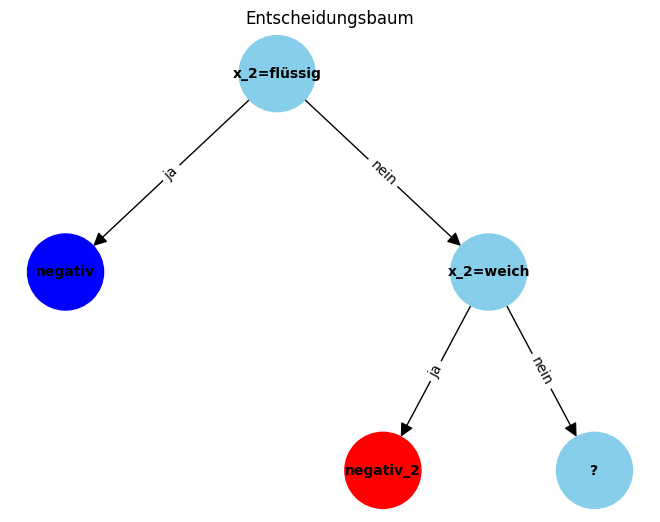

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx
# Erstellen eines gerichteten Graphen
G = nx.DiGraph()

# Hinzufügen von Knoten und Kanten
G.add_node("x_2=flüssig")
G.add_node("negativ", color='blue')
G.add_node("x_2=weich")
G.add_node("negativ_2", color='red')
G.add_node("?")

G.add_edge("x_2=flüssig", "negativ", label="ja")
G.add_edge("x_2=flüssig", "x_2=weich", label="nein")
G.add_edge("x_2=weich", "negativ_2", label="ja")
G.add_edge("x_2=weich", "?", label="nein")

# Zeichnen des Graphen
pos = {
    "x_2=flüssig": (0, 1),
    "negativ": (-1, 0.5),
    "x_2=weich": (1, 0.5),
    "negativ_2": (0.5, 0),
    "?": (1.5, 0)
}

labels = nx.get_edge_attributes(G, 'label')
colors = [G.nodes[node].get('color', 'skyblue') for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=colors, font_size=10, font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='black')
plt.title('Entscheidungsbaum')
plt.show()

Nächste Frage $x_1 =$ rot:

$i(L) = 0$

$i(R) = 0$

$\Delta i(N) = 1 - 0 - 0 = 1$

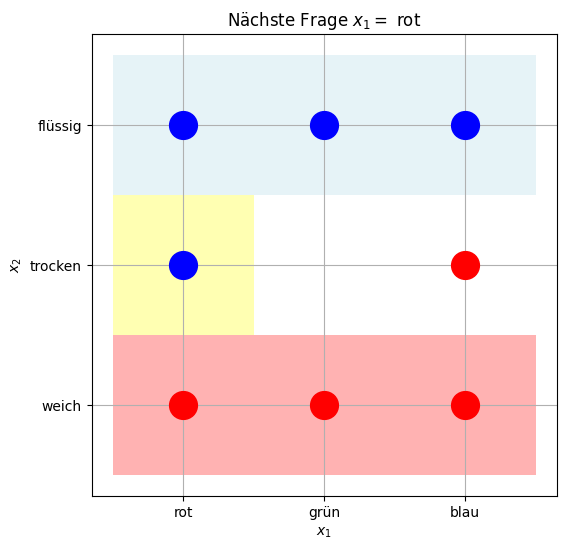

In [29]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe, blaue und rote Rechtecke hinzufügen
rect = patches.Rectangle((-0.5, 0.5), 1, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)
rect3 = patches.Rectangle((-0.5, 1.5), 3, 1, linewidth=1, edgecolor='none', facecolor='red', alpha=0.3)
ax.add_patch(rect3)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_1 =$ rot')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Nächste Frage $x_1 =$ grün:

$i(L) = 0$

$i(R) = 1$

$\Delta i(N) = 1 - 0 - 1 = 0$

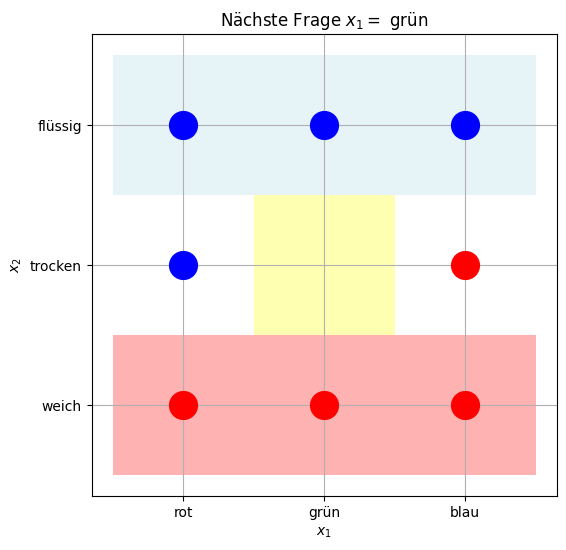

In [30]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe, blaue und rote Rechtecke hinzufügen
rect = patches.Rectangle((0.5, 0.5), 1, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)
rect3 = patches.Rectangle((-0.5, 1.5), 3, 1, linewidth=1, edgecolor='none', facecolor='red', alpha=0.3)
ax.add_patch(rect3)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_1 =$ grün')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Nächste Frage $x_1 =$ blau:

$i(L) = 0$

$i(R) = 0$

$\Delta i(N) = 1 - 0 - 0 = 1$

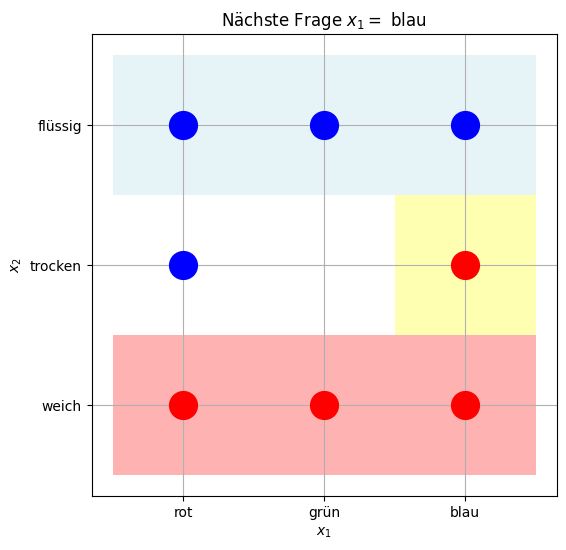

In [31]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Gelbe, blaue und rote Rechtecke hinzufügen
rect = patches.Rectangle((1.5, 0.5), 1, 1, linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3)
ax.add_patch(rect)
rect2 = patches.Rectangle((-0.5, -0.5), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3)
ax.add_patch(rect2)
rect3 = patches.Rectangle((-0.5, 1.5), 3, 1, linewidth=1, edgecolor='none', facecolor='red', alpha=0.3)
ax.add_patch(rect3)

# Kreise plotten
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if data[i][j] is not None:
            ax.plot(j, i, 'o', color=data[i][j], markersize=20)

# Achsenbeschriftungen und -ticks setzen
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Titel und Gitter
ax.set_title('Nächste Frage $x_1 =$ blau')
ax.grid(True)

# Plot anzeigen
plt.gca().invert_yaxis()
plt.show()

Wir wählen also als nächstes Frage $x_1 =$ rot, da sie neben $x_1 =$ blau den maximalen $\Delta i(N)$-Wert besitzt. Außerdem stellen wir fest, dass die Daten im linken Knoten rein sind und wir können damit direkt die Klasse positiv (blau) bestimmen. Auch der rechte Knoten ist nun rein negativ (rot) und wir sind fertig.

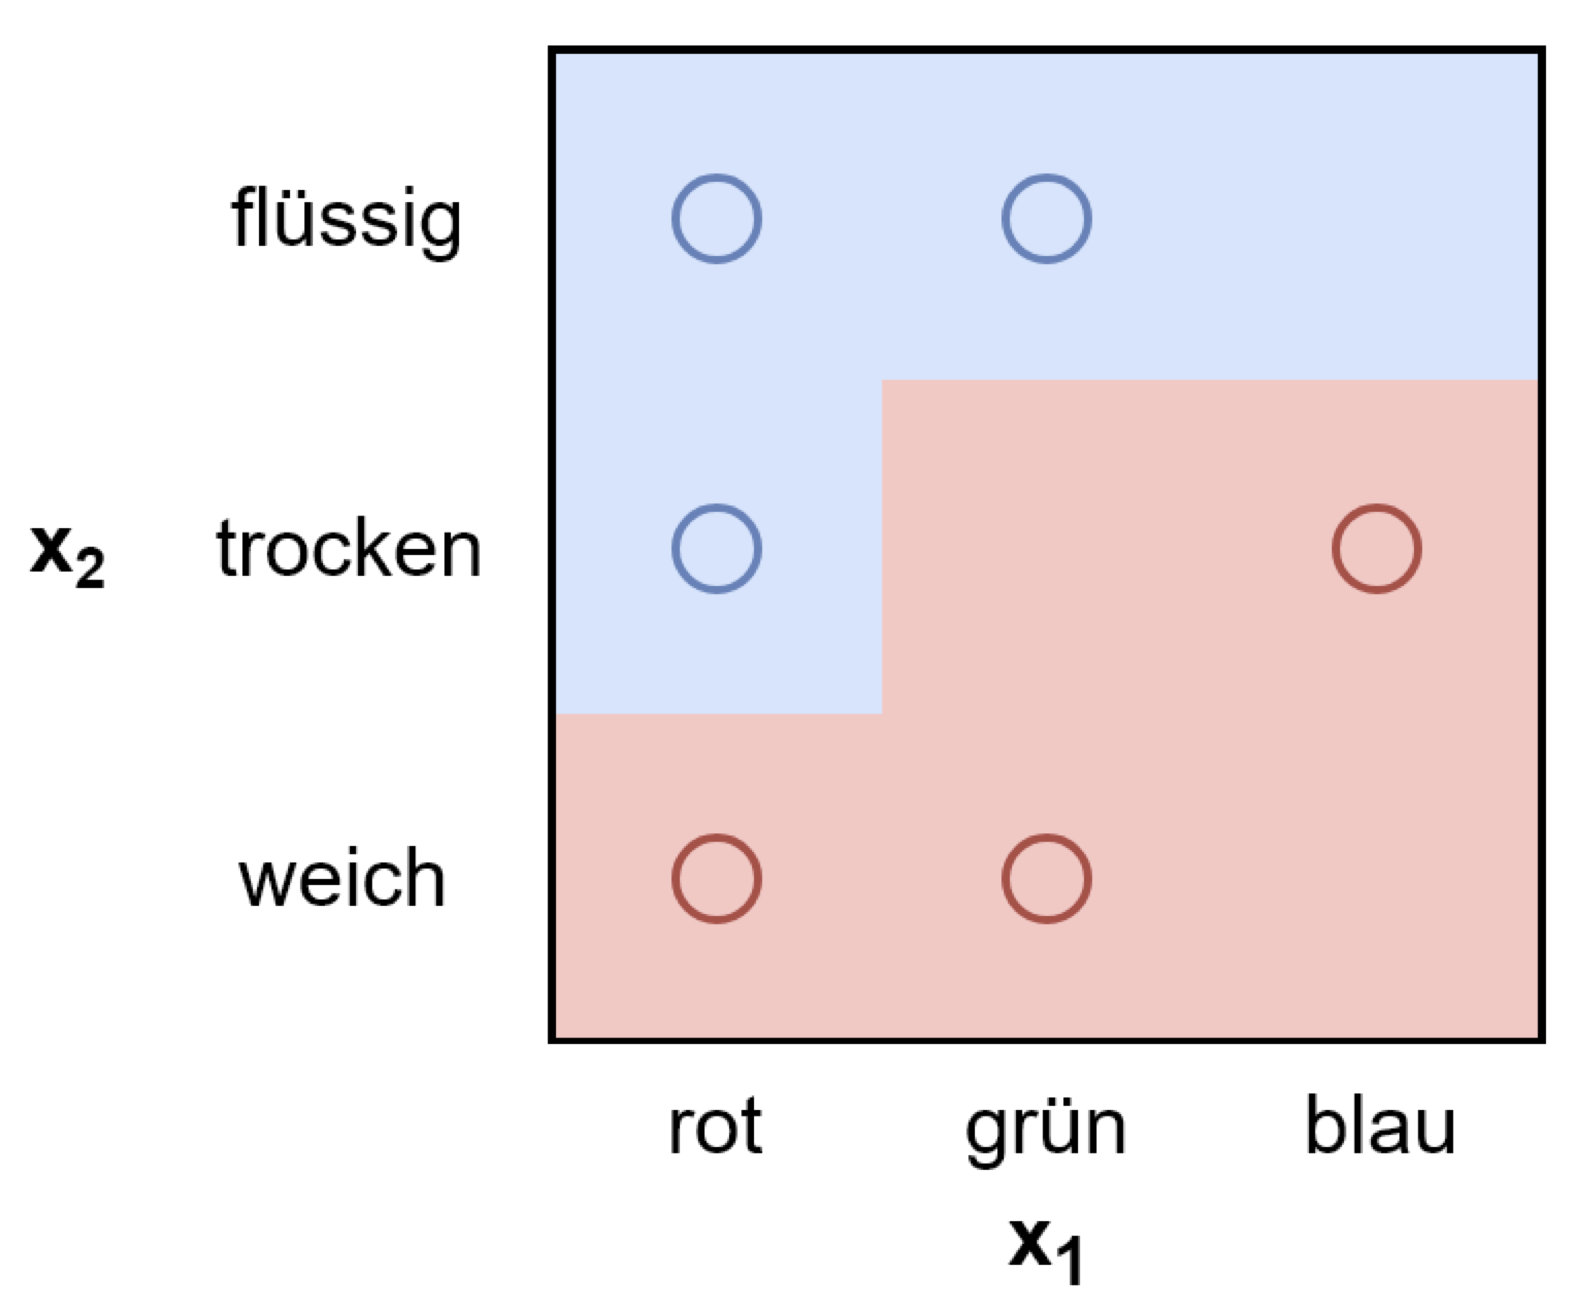

In [33]:
# Bild anzeigen
image_path = "media/dec_final.png"  # Pfad zum Bild
display(Image(filename=image_path))

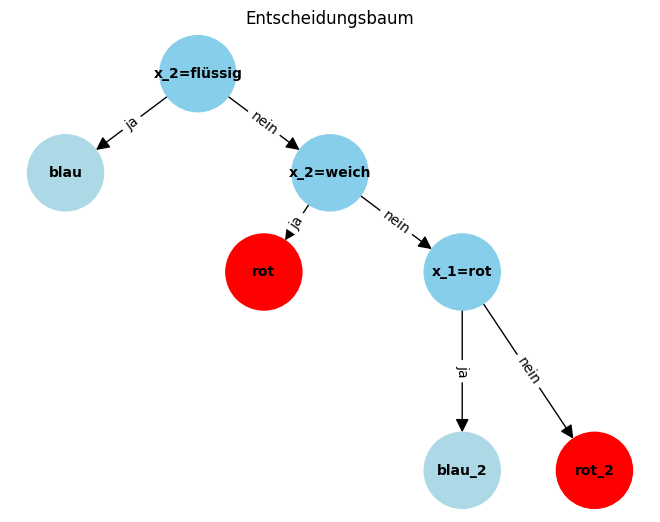

In [37]:
# Erstellen eines gerichteten Graphen
G = nx.DiGraph()

# Hinzufügen von Knoten und Kanten
G.add_node("x_2=flüssig")
G.add_node("blau", color='lightblue')
G.add_node("x_2=weich")
G.add_node("rot", color='red')
G.add_node("x_1=rot")
G.add_node("blau_2", color='lightblue')
G.add_node("rot_2", color='red')

G.add_edge("x_2=flüssig", "blau", label="ja")
G.add_edge("x_2=flüssig", "x_2=weich", label="nein")
G.add_edge("x_2=weich", "rot", label="ja")
G.add_edge("x_2=weich", "x_1=rot", label="nein")
G.add_edge("x_1=rot", "blau_2", label="ja")
G.add_edge("x_1=rot", "rot_2", label="nein")

# Zeichnen des Graphen
pos = {
    "x_2=flüssig": (0, 2),
    "blau": (-1, 1.5),
    "x_2=weich": (1, 1.5),
    "rot": (0.5, 1),
    "x_1=rot": (2, 1),
    "blau_2": (2, 0),
    "rot_2": (3, 0)
}

labels = nx.get_edge_attributes(G, 'label')
colors = [G.nodes[node].get('color', 'skyblue') for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=colors, font_size=10, font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='black')
plt.title('Entscheidungsbaum')
plt.show()

Im Falle von reellwertigen Features, etwa $X = \mathbb{R}^d$ können und sollten die entsprechenden Fragen passend gewählt werden. Oftmals werden auch Linearkombinationen erlaubt, was die Baumkomplexität deutlich verringert.

- Der vorgestellte Algorithmus zur Selektion von Fragen durch Maximierung des Unreinheitsrückgangs ist lokal und damit greedy. Das bedeutet, es gibt keine Garantie, dass die Folge von lokalen Festlegungen zu einem globalen Optimum bzgl. der Baumgröße führt.

- Obwohl es eigentlich gilt die Missclassification Impurity zu reduzieren ist oft die Gini Unreinheit vorzuziehen, da sie vorausschauender ist.

- In der Praxis ist jedoch meist die Wahl des Maßes für Unreinheit nebensächlich. Wichtiger sind Kriterien, wann der Baumaufbau gestoppt oder wann gestutzt werden soll.

## Stoppkriterien

Problem: Baut man den Baum an allen Stellen immer bis zur minimalen Unreinheit, wird sich mit sehr großer Wahrscheinlichkeit im Regime der Überanpassung befinden.

Im Extremfall z.B. besteht jedes Blatt aus einem einzigen Datenpunkt, der Baum hat also die Trainingsdaten auswendig gelernt.

Testfehlerkriterium: Eine allgemeine Möglichkeit ist es, einen Split der Daten $D = T \cup V$ in Trainings- und Testdaten durchzuführen und nach jedem Schritt im Baumaufbau den Fehler auf den Testdaten zu protokollieren. Schließlich verwendet man die Splittingtiefe pro Baumteil, welcher zum minimalen Testfehler geführt hatte.

Mindestreduktion: Eine weitere direkte Möglichkeit ist es, von weiteren Splits abzusehen, wenn der beste Split nicht zu einer Reduktion der Unreinheit größer als ein zu wählender Hyperparameter $\beta \in \mathbb{R}_{\geq 0}$ führt, also wenn

$max \Delta i(N) < \beta$.

- Hier können alle Daten für das Lernen verwendet werden und Blätter können auf allen Ebenen liegen (vorteilhaft bei hoher Diversität in den Feature-Dimensionen).

- Jedoch ist die optimale Wahl des Hyperparameters $\beta$ meist nicht ersichtlich.

Mindestgröße: Hier wird das Splitting beendet, sobald eine Mindestgröße der Datenmenge entweder absolut (Anzahl der Datenpunkte, z.B. 50) oder relativ (Anteil an der Trainingsdatenmenge, z.B. 3%) unterschritten wird.

- Diese Methode hat den Vorteil, dass sich die Partitionsgrößen bei ungleich verteilten Daten anpassen, d.h. man erhält kleine Partitionen bei dichten Daten und große Partitionen bei spärlichen Daten.

Globale Kriterien: Der Baum wird gesplittet solange, bis ein Minimum bzgl. eines globalen Kriteriums

$\alpha \cdot \text{Größe} + \sum_{\text{Blätter}} i(N)$

eingenommen wird. Als Maß für die Größe kann z.B. die Anzahl der Knoten und/oder Kanten des Baums verwendet werden. Der Hyperparameter $\alpha \in \mathbb{R}_{\geq 0}$ wägt zwischen der Größe und der Unreinheit der Blätter ab.

- Im Falle der Entropie als Unreinheitsmaß hat der Term $\sum_{\text{Blätter}} i(N)$ eine intuitive Bedeutung als Maß für die Gesamtunsicherheit (in Bits) der Trainingsdaten innerhalb der Baumrepräsentation.

- Auch hier ist die optimale Wahl des Hyperparameters $\alpha$ meist nicht ersichtlich.

**Hypothesentest**: Hier wird getestet, ob ein Split sich signifikant von einem zufälligen Split unterscheidet. Angenommen $n$ Datenpunkte befinden sich in einem Knoten wovon tatsächlich $n_1$ Punkte zu Klasse $y_1$ und $n_2$ Punkte zu Klasse $y_2$ gehören und der zu untersuchende Split packt den Bruchteil $pn$ der Punkte in den linken Ast und $(1-p)n$ in den rechten Ast. Ein zufälliger Split würde $pn_1$ der Klasse $y_1$ Punkte und $pn_2$ der Klasse $y_2$ Punkte nach links packen. Man kann nun mit der Chi-Quadrat-Statistik

$X^2 = \sum_{i=1}^2 \frac{(n_i^L - pn_i)^2}{pn_i}$

wobei $n_i^L$ die Anzahl der vom Split nach links gepackten Punkte ist, bei vorher gewählten Konfidenz mit Hilfe der $X^2$-Wertetabelle überprüfen, ob man einen zufälligen Split ausschließen kann ($X^2 > \text{Tabellenwert}$).

Hypothesentest II: Conditional Inference Trees [HHZ06]

- Wahl des besten Splits über sog. Permutationstests

- Merkmale mit vielen Splitmöglichkeiten, wie z.B. vielen Kategorien oder metrische Größen, werden nicht systematisch bevorzugt (im Gegensatz zu z.B. CHAID mittels $X^2$-Tests oder CART) – Ansatz somit unbiased bzgl. Wahl des Splitmerkmals

- Aktuell keine Python-Implementierung vorhanden, aber z.B. Funktion ctree in R im Paket partykit

Stoppkriterien leiden unter dem Horizonteffekt, d.h. bei einem zu früh entschiedenen Stopp werden evtl. spätere, global gesehen jedoch gute Splits nicht erkannt. Beim Stutzen wird der Baum komplett aufgebaut (Blätter haben minimale Unreinheit) und anschließend werden Teile des Baums entfernt.

- Die Vorteile sind, dass der Horizonteffekt vermieden wird, alle Trainingsdaten verwendet werden und der Baum potentiell interpretierbarer wird.

- Der Nachteil ist, dass die Berechnungskosten höher sind, als im Falle von Stoppkriterien.

Verschmelzen: Bei dieser Strategie werden sukzessive Splits rückgängig gemacht. Dies geschieht durch das Verschmelzen von Knoten oft angefangen von den Blättern, die nur einen kleinen Beitrag zur Unreinheit leisten.

Regeln: Jedes Blatt kann durch eine korrespondierende aussagenlogische Formel bzgl. der Features beschrieben werden. Durch Betrachtung dieser Liste können potentiell auf der Formelebene Vereinfachungen gefunden werden.

## Klassenzuordnung

Wenn keine Unreinheit in einem Blatt herrscht, so ist die Klassenzuordnung klar. Durch Stoppkriterien oder Stutzen können sich in einem Blatt Datenpunkte verschiedener Klassen befinden. In diesem Fall wird meist die Klasse mit den meisten Datenpunkten gewählt.

## Unvollständige Daten

Manchmal kommt es vor, dass nicht für alle Trainings- bzw. Testdaten alle Features bekannt sind. Im Obstbeispiel z.B. könnte für ein Exemplar die Farbe und die Größe unbekannt sein, also $x = (?, \text{rund}, ?, \text{süß}) \in D$. In solchen Fällen

- kann man diese Daten aus den Trainingsdaten entfernen (nur sinnvoll wenn $|D|$ groß)

- oder (besser) man passt die Berechnung der Unreinheit an die vorhandenen Daten je Feature/Frage an.

- In jedem Fall muss der Entscheidungsbaum an jedem Knoten Alternativen bereitstellen, falls ein Feature 

## Ausblick: Bäume für Regressionsprobleme

Man kann auch für metrische Zielgrößen Bäume fitten:

- geeignete Verlustfunktion für die Splits: variance impurity; entspricht dem quadratischen Verlust

- als Prognose verwendet man dann den Mittelwert (ideale konstante Vorhersage zum quadratischen Verlust)

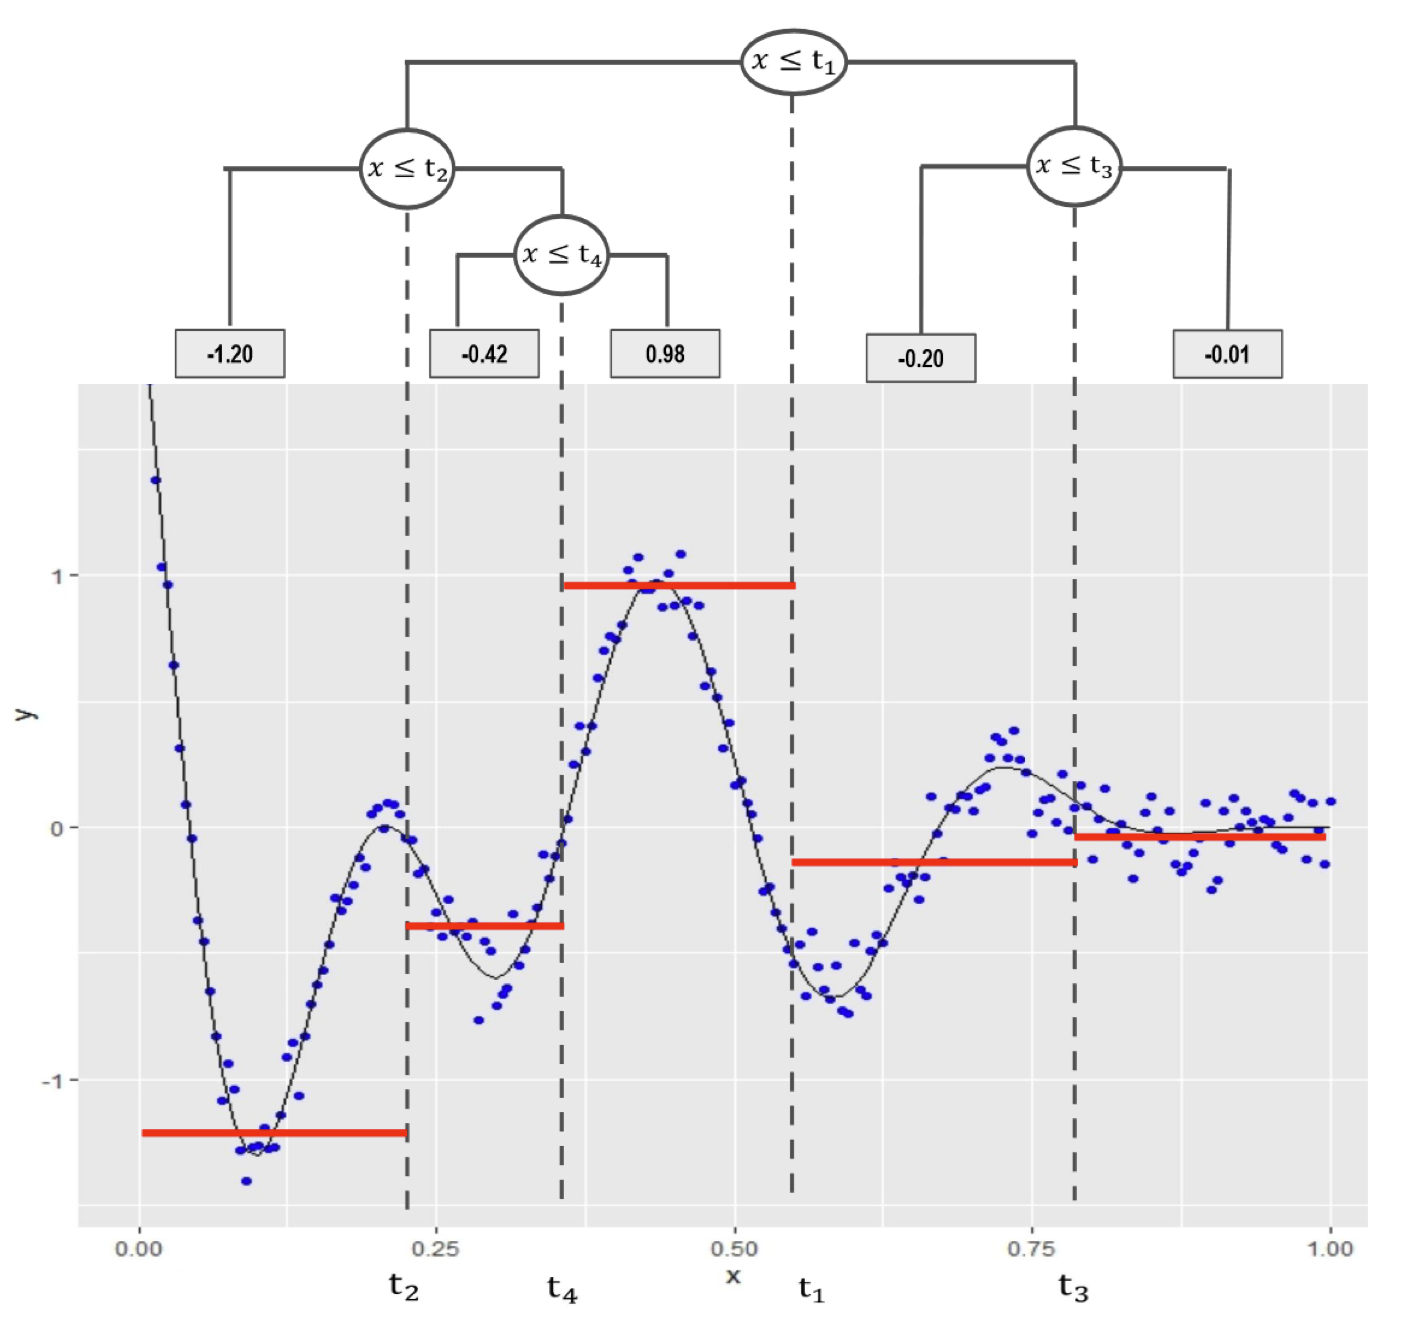

In [38]:
# Bild anzeigen
image_path = "media/dec_ausblick.png"  # Pfad zum Bild
display(Image(filename=image_path))

## Zusammenfassung: Vor- und Nachteile von Bäumen

Vorteile von Bäumen:

- Eher einfach zu verstehen, zu interpretieren und zu visualisieren
- Wenig Preprocessing der Daten nötig:
  - numerische und nicht-numerische Features sind möglich
  - Features können fehlende Werte enthalten
  - Ausreißer in den Features meist unproblematisch
  - monotone Transformationen der Features haben keinen Effekt, d.h. Skalierung der Features ist irrelevant
- Interaktionen zwischen den Features sind einfach möglich; sogar Interaktionen höherer Ordnung
- Bäume können Sprungstellen und nicht-lineare Effekte modellieren
- Automatische Selektion von Features
- Berechnung relativ schnell; skaliert gut für große Datenmengen

Lineare Abhängigkeiten müssen über mehrere Splits modelliert werden


Nachteile von Bäumen:

- Lineare Abhängigkeiten müssen über mehrere Splits modelliert werden (vgl. Abbildung vorherige Folie)
- die Prognosefunktion von Bäumen ist nicht glatt, sondern immer eine Treppenfunktion
- Große Instabilität (Varianz) in den Bäumen:
  - kleine Änderungen in den Trainingsdaten können zu völlig anderen B
- das reduziert das Vertrauen in die Interpretation der Bäume
- diese Instabilität ist einer der Gründe warum die Prognosefehler von Bäumen meist nicht die besten sind
- Bei Regressionsbäumen: Bäume modellieren abschnittweise konstante Funktionen; daher ist die Extrapolation oft schlecht